# BEATS BL raytracing: 3PW flux in 1mrad of Hor. acceptance
###### 28/03/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
from pandas_ods_reader import read_ods
import h5py

%precision %.3g

'%.3g'

In [2]:
%matplotlib inline

In [3]:
homedir = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/3PW_plots/'

## 3PW flux in 1mrad of Hor. acceptance angle - XOP and Shadow simulation

In [4]:
# read CSV file with shadow results
names = ['E', 'E0', 'E1', 'I', 'n']
Flux1mrad_filecsv = '/home/gianthk/Oasys/BEATS/BEATS_BL_Oasys/BEATS_BL_Flux_1mrad.csv'
Flux1mrad = pd.read_csv(Flux1mrad_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])
Flux1mrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
E     10 non-null int64
E0    10 non-null int64
E1    10 non-null int64
I     10 non-null float64
n     10 non-null float64
dtypes: float64(2), int64(3)
memory usage: 528.0 bytes


In [6]:
# read 3PW flux from XOP
fluxdata = pd.read_csv(homedir+'3PW_flux.csv', sep=',', names=['E', 'F'], skiprows=[0])
F_source = np.array([fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][0]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][1]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][2]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][3]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][4]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][5]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][6]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][7]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][8]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][9]-fluxdata['E']))]])

In [7]:
# scale flux by intensity through 1mrad aperture
Flux_1mrad = F_source*Flux1mrad['I']/Flux1mrad['n']

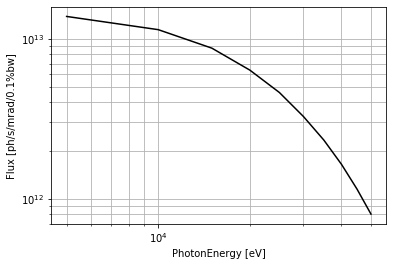

In [8]:
# plot flux in 1mrad Hor. acc.
f, ax = plt.subplots()
ax.loglog(Flux1mrad['E'], Flux_1mrad, 'k')
plt.xlabel('PhotonEnergy [eV]')
plt.ylabel('Flux [ph/s/mrad/0.1%bw]')
plt.grid(True, which="both")
# f.savefig("3PW_flux_XOP.png", bbox_inches='tight', dpi=600)

## Comparison with other tomography beamlines

#### Load tabulated values for G1

In [9]:
Tab5_2 = pd.read_csv(homedir+'Table5.2.csv', sep=',', names=['y', 'G1', 'H2'], skiprows=[0])

#### Storage ring parameters:

In [10]:
# ESRF, PLS-II, PETRA, ELETTRA, ANKA, SESAME, SLS
Ee = np.array([6.0, 3.0, 6.08, 2.4, 2.5, 2.5, 2.4]) # Storage ring energy [Gev]
I = np.array([0.200, 0.350, 0.100, 0.310, 0.1, 0.25, 0.400]) # Current [A]
gamma = 1957 * Ee

#### Bending magnet fields

In [11]:
# BENDING MAGNETS @ ELETTRA, ANKA, BEATS 3PW, TOMCAT
B_BM = np.array([1.45, 1.5, 3, 2.9]) # BM field [T]

#### Wiggler parameters

In [12]:
lambda_w = np.array([125e-3, 140e-3]) # Wiggler periods [m] (W125_ID17@ESRF, MPW_2T_6C@PLS-II)
Nw = np.array([12, 8])
Kw = np.array([17.5, 26.4])
Bw = (2*np.pi*constants.m_e*constants.c*Kw)/(constants.e*lambda_w) # Wiggler field [T]
# K = constants.e*B0*lambda_u/(2*np.pi*constants.m_e*constants.c)

#### The undulator of B05@PETRA

En 5540.76819210582 eV
B0: 0.4685513899377488 [T]


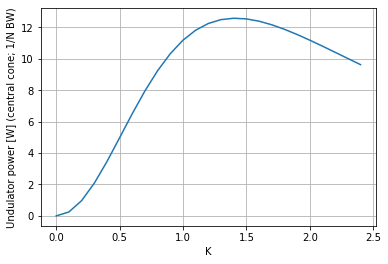

In [13]:
lambda_u = 32e-3 # [m]
Nu = 62
K0 = np.arange(0, 2.5, 0.1)
B00 = (2*np.pi*constants.m_e*constants.c*K0)/(constants.e*lambda_u) # [T]

lambda_0 = (lambda_u*1e9/(2*gamma[2]**2))*(1+(K0**2/2)) # [nm]
En = 1239.842/lambda_0 # [eV]
P_cen = ((np.pi*constants.e*gamma[2]**2*I[2])/(constants.epsilon_0*lambda_u))*((K0**2)/((1+K0**2/2)**2))

plt.plot(K0, P_cen)
plt.grid(True, which="both")
ax.set_xscale('log')
plt.xlabel('K')
plt.ylabel('Undulator power [W] (central cone; 1/N BW)')

# with K=1.4:
print('En', 1239.842/((lambda_u*1e9/(2*gamma[2]**2))*(1+(1.4**2/2))), 'eV')
Ku = 1.4
Bu = (2*np.pi*constants.m_e*constants.c*Ku)/(constants.e*lambda_u) # [T]
print('B0:', Bu, '[T]')

#### Total Power

In [14]:
Ptot_ID17 = np.pi*constants.e*Kw[0]**2*gamma[0]**2*I[0]*Nw[0]/(3*constants.epsilon_0*lambda_w[0]) # [Watt]
Ptot_PLS2_6C = np.pi*constants.e*Kw[1]**2*gamma[1]**2*I[1]*Nw[1]/(3*constants.epsilon_0*lambda_w[1])
Ptot_P05 = np.pi*constants.e*Ku**2*gamma[2]**2*I[2]*Nu/(3*constants.epsilon_0*lambda_u)

#### Critical and fundamental energies

* Undulator fundamental wavelength (undulator Eq.): Eq. 5.28 in [1]
* Bending magnet critical energy: Eq. 5.7b in [1]

[1] Attwood, David. 1999. “Soft X-Rays and Extreme Ultraviolet Radiation: Principles and Applications.” Cambridge Core. Cambridge University Press. August 1999. https://doi.org/10.1017/CBO9781139164429.


In [15]:
hbar = constants.physical_constants['Planck constant in eV/Hz'][0]/(2*np.pi) # [eV*s]

# WIGGLERS
Ecw = 3*constants.e*gamma[0:2]**2*Bw*hbar/(2*constants.m_e)

# UNDULATOR
lambda_fundamental_u = (lambda_u*1e9/(2*gamma[2]**2))*(1+(Ku**2/2)) # [nm]
E_fundamental_u = 1239.842/lambda_fundamental_u # [eV]

# BENDING MAGNETS
EcBM = 0.665*Ee[3:7]**2*B_BM

#### WIGGLERS Flux per unit Hor. angle
Eq. 5.87 in:
Attwood, David. 1999. “Soft X-Rays and Extreme Ultraviolet Radiation: Principles and Applications.” Cambridge Core. Cambridge University Press. August 1999. https://doi.org/10.1017/CBO9781139164429.

In [16]:
F_acc_angle_ID17 = 4.92e13*Nw[0]*Ee[0]*I[0]*Tab5_2['G1']
En_ID17 = Ecw[0]*Tab5_2['y']

F_acc_angle_PLS2 = 4.92e13*Nw[1]*Ee[1]*I[1]*Tab5_2['G1']
En_PLS2 = Ecw[1]*Tab5_2['y']

#### UNDULATOR Flux in the central cone
* Undulator central radiation cone: Eq. 5.32 in [1]
* Undulator power in the central radiation cone: Eq. 5.39 in [1]

[1] Attwood, David. 1999. “Soft X-Rays and Extreme Ultraviolet Radiation: Principles and Applications.” Cambridge Core. Cambridge University Press. August 1999. https://doi.org/10.1017/CBO9781139164429.


In [17]:
K = np.arange(0.0, 2.5, 0.1)

lambda_0 = (lambda_u*1e9/(2*gamma[2]**2))*(1+(K**2/2)) # [nm]
En_P05 = 1239.842/lambda_0 # [eV]

# Power in the central cone
P_cen_P05 = ((np.pi*constants.e*gamma[2]**2*I[2])/(constants.epsilon_0*lambda_u))*((K**2)/((1+K**2/2)**2)) # [Watt]

# Bandwidth
BW = 1/Nu
print('BW:', 100*BW, '%')

# Central radiation cone
theta_cen = np.sqrt(1+K**2/2)/gamma[2]*np.sqrt(Nu)
theta_cen_K1 = 1000*np.sqrt(1+1/2)/gamma[2]*np.sqrt(Nu) # with K=1
print('Central radiation cone half angle (K=1):', theta_cen_K1, '[mrad]')

# Power 2 Flux conversion
F_cen_P05 = 5.034e15*lambda_0*P_cen_P05 # [Ph/s]

# In 1 mrad and 0.1% BW
F_acc_angle_P05 = (F_cen_P05/theta_cen)/(BW/0.001) # [Ph/s/mrad (0.1% BW)]

BW: 1.6129032258064515 %
Central radiation cone half angle (K=1): 0.8104888962187823 [mrad]


#### Bending magnet Flux in 1mrad and 0.1%BW
Eq. 5.8 in:
Attwood, David. 1999. “Soft X-Rays and Extreme Ultraviolet Radiation: Principles and Applications.” Cambridge Core. Cambridge University Press. August 1999. https://doi.org/10.1017/CBO9781139164429.

In [18]:
# Flux in 1mrad and 0.1%BW
F_SYRMEP = 2.46e13*Ee[3]*I[3]*Tab5_2['G1']
F_TopoTomo = 2.46e13*Ee[4]*I[4]*Tab5_2['G1']
F_BEATS = 2.46e13*Ee[5]*I[5]*Tab5_2['G1']
F_TOMCAT = 2.46e13*Ee[6]*I[6]*Tab5_2['G1']

# Energy arrays
En_SYRMEP = 1e3*EcBM[0]*Tab5_2['y']
En_TopoTomo = 1e3*EcBM[1]*Tab5_2['y']
En_BEATS = 1e3*EcBM[2]*Tab5_2['y']
En_TOMCAT = 1e3*EcBM[3]*Tab5_2['y']

#### Plots

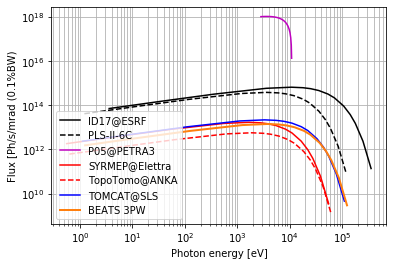

In [25]:
f, ax = plt.subplots()

plt.plot(En_ID17, F_acc_angle_ID17, 'k')
plt.plot(En_PLS2, F_acc_angle_PLS2, '--k')
plt.plot(En_P05[1:], F_acc_angle_P05[1:], 'm')
plt.plot(En_SYRMEP, F_SYRMEP, 'r')
plt.plot(En_TopoTomo, F_TopoTomo, '--r')
plt.plot(En_TOMCAT, F_TOMCAT, 'b')
plt.plot(En_BEATS, F_BEATS, 'C1', linewidth=2)
# plt.plot(Flux1mrad['E'], Flux_1mrad, 'C1', linewidth=3)

plt.legend(['ID17@ESRF', 'PLS-II-6C', 'P05@PETRA3', 'SYRMEP@Elettra', 'TopoTomo@ANKA', 'TOMCAT@SLS',  'BEATS 3PW', 'BEATS 3T BM'], loc='lower left')
# plt.legend(['ID17@ESRF', 'PLS-II-6C', 'SYRMEP@Elettra', 'TopoTomo@ANKA', 'BEATS 3PW', 'TOMCAT@SLS', 'BEATS2'], loc='lower left')

plt.grid(True, which="both")
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Photon energy [eV]')
plt.ylabel('Flux [Ph/s/mrad (0.1%BW)')
f.savefig(homedir+'Flux_tomo_BLs.png', bbox_inches='tight', dpi=600)

#### Zoom

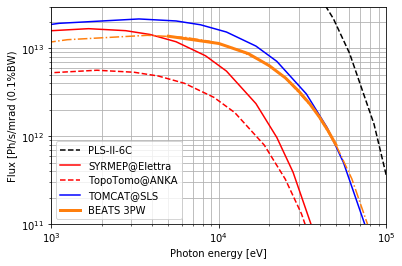

In [27]:
f, ax = plt.subplots()

plt.plot(En_PLS2, F_acc_angle_PLS2, '--k')
plt.plot(En_SYRMEP, F_SYRMEP, 'r')
plt.plot(En_TopoTomo, F_TopoTomo, '--r')
plt.plot(En_TOMCAT, F_TOMCAT, 'b')
plt.plot(Flux1mrad['E'], Flux_1mrad, 'C1', linewidth=3)
plt.plot(En_BEATS, F_BEATS, '-.C1')
ax.set(xlim=(1e3, 1e5), ylim=(1e11, 3e13))

plt.legend(['PLS-II-6C', 'SYRMEP@Elettra', 'TopoTomo@ANKA', 'TOMCAT@SLS', 'BEATS 3PW'], loc='lower left')
# plt.legend(['ID17@ESRF', 'PLS-II-6C', 'SYRMEP@Elettra', 'TopoTomo@ANKA', 'BEATS 3PW', 'TOMCAT@SLS', 'BEATS2'], loc='lower left')

plt.grid(True, which="both")
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Photon energy [eV]')
plt.ylabel('Flux [Ph/s/mrad (0.1%BW)')
f.savefig(homedir+'Flux_tomo_BLs_zoom.png', bbox_inches='tight', dpi=600)

#### BEATS Flux in 1mrad Hor. acceptance - comparison formula VS XOP and Shadow simulations

Text(0, 0.5, 'F [Ph/s/mrad (0.1%BW)')

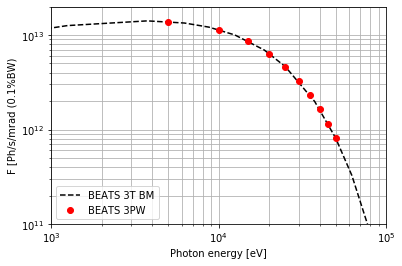

In [28]:
f, ax = plt.subplots()
plt.plot(En_BEATS, F_BEATS, '--k')
plt.plot(Flux1mrad['E'], Flux_1mrad, 'or')
ax.set(xlim=(1e3, 1e5), ylim=(1e11, 2e13))

plt.legend(['BEATS 3T BM', 'BEATS 3PW'], loc='lower left')

plt.grid(True, which="both")
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Photon energy [eV]')
plt.ylabel('F [Ph/s/mrad (0.1%BW)')